In [481]:
# Import Packages that was provided
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

*Question 2 A:*

In [482]:
# 2A.I
# Create Matrix
matrix = np.random.randn(3,2)
# Print Matrix
print(matrix)

[[-0.6638943   0.09941677]
 [-0.55235098  0.09317108]
 [-0.23241957  1.42890792]]


In [483]:
# 2A.II
# Get matrix rank
rank = np.linalg.matrix_rank(matrix)

# Print Matrix Rank
print("The rank of the matrix is:",rank)

The rank of the matrix is: 2


In [484]:
# 2A.III
# Get the norm of each vector in the matrix
for x in range(2):
    # Print the norm of the vector
    print("Norm of Vector", x, ":", np.linalg.norm(matrix[:,x]))

# Get vector A
vectorA = np.squeeze(np.asarray(matrix[:,0]))
# Get vector B
vectorB = np.squeeze(np.asarray(matrix[:,1]))

# Print Inner product
print("Inner product:", np.inner(vectorA, vectorB))

Norm of Vector 0 : 0.8943523403281968
Norm of Vector 1 : 1.43538927936776
Inner product: -0.44957153668815725


In [485]:
# 2A.IV
# Factorization of the matrix where q is orthonormal and r is upper-triangular
q, r = np.linalg.qr(matrix)
# Get vector 1
vector1 = np.squeeze(np.asarray(q[:,0]))
# Get vector 2
vector2 = np.squeeze(np.asarray(q[:,1]))
# Get vector 3
vector3 = vector1 + vector2

# Print the vectors that lie in the subspace
print("Vector 1:", vector1)
print("Vector 2:", vector2)
print("Vector 3:", vector3)


Vector 1: [-0.74231851 -0.61759886 -0.25987473]
Vector 2: [-0.20359422 -0.16160943  0.96562508]
Vector 3: [-0.94591273 -0.77920829  0.70575034]


*Question 2 B*

In [486]:
# 2B.I
# Second matrix made with 250 x 3 samples
xMatrix = np.zeros((250, 3))
# Get x = Ab
for i in range(250):
    # Random b values
    b = np.random.randn(2, 1)
    # Multiply A by b to get x i.e. x = Ab
    x = np.matmul(matrix, b)
    xMatrix[i] = np.squeeze(x)

2B.II

Each sample of $x_{i}$ lies in the span of S and can be written as a linear combinations of the vector.

In [487]:
# 2B.III
# Print the dimensions of the X matrix
print("n is 250, p is 3")
# Confirm the dimensions of the X Matrix
print("Dimensionality of X Matrix:", np.shape(xMatrix))

n is 250, p is 3
Dimensionality of X Matrix: (250, 3)


In [488]:
# 2B.IV
# Get rank of the X matrix
rank = np.linalg.matrix_rank(xMatrix)
# Print the rank of the X matrix
print(rank)

2


*Question 2 C*

In [489]:
# 2C.IA
# Single Value Decomposition
u, s, vh = np.linalg.svd(xMatrix)
# Get Eigen Vectors
w, v = np.linalg.eig(np.matmul(np.transpose(xMatrix), xMatrix))
right = np.transpose(vh)
eigenVector = v

# Print Right singular vector
print("Right Singular Vector: ")
print(right)

# Print Eigen Values
print("Eigen Vector: ")
print(eigenVector)

Right Singular Vector: 
[[ 0.20840866 -0.74098125  0.63836715]
 [ 0.18005711 -0.61247481 -0.76971036]
 [ 0.96132475  0.27535685  0.00577388]]
Eigen Vector: 
[[-0.20840866 -0.74098125  0.63836715]
 [-0.18005711 -0.61247481 -0.76971036]
 [-0.96132475  0.27535685  0.00577388]]


In [490]:
# 2C.IB
# Singular Values Squared == Eigen Values
sSquared = np.power(s, 2)
# Print Eigen Values (Singular Values Squared)
print("Eigen Values: ")
print(sSquared)

Eigen Values: 
[5.86487019e+02 1.59520479e+02 1.29897820e-29]


In [491]:
# 2C.IC
# Get the energy of the X Matrix
sum = np.sum(sSquared)
# Print the energy
print("Energy of X Matrix:", sum)

Energy of X Matrix: 746.0074984816171


In [492]:
# 2C.IIA
print(s)
'''
I would assume due to the way floats work along with the random function and the rounding when we used the svd function
for the matrix the final number should be zero but is a float instead. Seeing how it is e ^ -16 it is very
close to zero.
'''


[2.42174941e+01 1.26301417e+01 3.60413402e-15]


'\nI would assume due to the way floats work along with the random function and the rounding when we used the svd function\nfor the matrix the final number should be zero but is a float instead. Seeing how it is e ^ -16 it is very\nclose to zero.\n'

*2C.IIB*

The right singular row vectors are the axes for the subspace S as they are also the said axes for linear transformation
matrix A.

*2D.I*

The data samples created in X are linear combinations of the two linearly independent vectors of matrix A.
This allows for two 2 principal components to be used to capture the data.

*2D.IIA*

 $x_{k,i}$ is an Independent and Identically Distributed random variable that should have a value zero

In [493]:
#2D.IIB
# Empirical Mean Vector
mean = np.mean(xMatrix, axis=0)
print("Mean Vector: ")
print(mean)


Mean Vector: 
[0.02232104 0.01879442 0.03762436]


In [494]:
# 2D.III
# Get the max values for u1
a = s
max1index = np.argmax(a)
# U1
u1 = np.transpose(vh)[:, max1index]
# Get the max values for u2
a[max1index] = -1
max2index = np.argmax(a)
# U2
u2 = np.transpose(vh)[:, max2index]
# Print U1
print("u1:")
print(u1)
# Print U2
print("u2:")
print(u2)

u1:
[0.20840866 0.18005711 0.96132475]
u2:
[-0.74098125 -0.61247481  0.27535685]


In [495]:
# 2D.IV
# U = two principals component directions
u = np.matrix([u1, u2])
# Compute the features of the Matrix
features = np.transpose(np.matmul(u, np.transpose(xMatrix)))


In [496]:
# 2D.V
# Compute to reconstruct original data samples of X
og = np.matmul(features, u)


In [497]:
# 2D.V
# Compute the error (Try for a value 0)
error = np.power(np.linalg.norm(og - xMatrix), 2)
# Print error
print("Error:")
print(error)

Error:
2.3732609529768366e-29


In [498]:
# 2D.VII
# Get top principal component of X
u = np.zeros((3,2))
u[:, 0] = u1
# New Features
features = np.matmul(xMatrix, u)

In [499]:
# 2D.VIII
# Compute the Original data samples
original = np.matmul(features, np.transpose(u))


In [500]:
# 2D.IX
# Compute the Error
error = np.power(np.linalg.norm(original - xMatrix), 2)
# Print Error
print("Error:")
print(error)
# Get the second-largest singular value of X
second = np.power(s[max2index], 2)
# Print the second-largest singular value of X
print("Second-largest singular value of X:")
print(second)


Error:
159.52047926022107
Second-largest singular value of X:
159.52047926022104


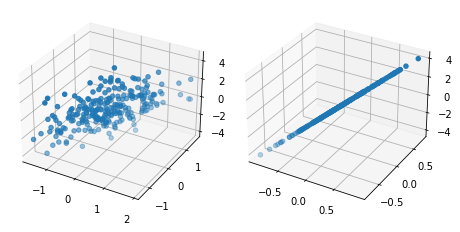

'\nThe first shape is scattered while the second shape is more like a line. The second shape is the result of PCA\ncalculations that we made.\n'

In [501]:
# 2D.X
# Make new figure
figure = plt.figure()
# Make a 3D projection
ax1 = figure.add_subplot(121, projection = '3d')
ax1.scatter(xMatrix[:, 0], xMatrix[:, 1], xMatrix[:, 2])
# Reconstructed Matrix
ax2 = figure.add_subplot(122, projection = '3d')
ax2.scatter(original[:, 0], original[:, 1], original[:, 2])
plt.subplots_adjust(0, 0, 1, 1, 0.1, 0)
# Print Figure
plt.show()

'''
The first shape is scattered while the second shape is more like a line. The second shape is the result of PCA
calculations that we made.
'''
